# Graded Challenge
Annesa Fadhila Damayanti
Batch 11

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

## Exploring Data

In [2]:
df = pd.read_csv('ks-projects-201801.csv')
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [3]:
df.shape

(378661, 15)

In [4]:
# melihat missing value
df.dropna(axis=1)

,ID,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real
0,1000002330,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,1533.95
1,1000003930,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,2421.0,30000.00
2,1000004038,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,45000.00
3,1000007540,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,5000.00
4,1000011046,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,50000.00
378657,999977640,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,1500.00
378658,999986353,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,15000.00
378659,999987933,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,15000.00


In [5]:
df['main_category'].value_counts()

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

In [6]:
df['currency'].value_counts()

USD    295365
GBP     34132
EUR     17405
CAD     14962
AUD      7950
SEK      1788
MXN      1752
NZD      1475
DKK      1129
CHF       768
NOK       722
HKD       618
SGD       555
JPY        40
Name: currency, dtype: int64

In [7]:
df['state'].value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

In [8]:
df['goal'].value_counts()

5000.00      29779
10000.00     26029
1000.00      16950
3000.00      15743
2000.00      15257
             ...  
3326.00          1
13325.00         1
140041.00        1
11111.19         1
28559.00         1
Name: goal, Length: 8353, dtype: int64

In [9]:
# Query terhadap main category, currency, goal, dan state
df.query("main_category == 'Music' & \
    currency == 'USD' & \
    goal > 15000 & \
    state == 'successful'")

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
541,1002617687,OPEN The TANK,Music,Music,USD,2016-02-28,57000.0,2016-02-06 15:39:33,61315.00,successful,694,US,61315.00,61315.00,57000.0
578,1002780789,Nabil & Karim | Anise K ~ Bicentenary Album,Music,Music,USD,2017-07-24,40000.0,2017-06-24 03:37:44,41224.95,successful,393,US,2000.00,41224.95,40000.0
596,1002877175,"Charlene Kaye makes a new record - ""Animal Love""",Music,Music,USD,2011-07-15,20000.0,2011-06-15 16:37:44,33535.05,successful,342,US,33535.05,33535.05,20000.0
2071,1010778576,"Help Reissue The 77s ""Pray Naked"" On CD & Vinyl",Rock,Music,USD,2016-05-01,17000.0,2016-04-01 21:59:26,30586.00,successful,545,US,30586.00,30586.00,17000.0
2131,1011132760,Big Blue Life - PW Gopal's New Music Project,Music,Music,USD,2014-11-28,25000.0,2014-10-19 23:13:52,27620.00,successful,280,US,27620.00,27620.00,25000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378181,99777446,Antigone Rising's 23 Red Fun'd!,Rock,Music,USD,2011-03-01,20000.0,2011-01-19 19:48:19,38105.22,successful,281,US,38105.22,38105.22,20000.0
378250,998079196,Kaleigh Baker's Full Length Album,Music,Music,USD,2015-04-08,18000.0,2015-03-09 00:31:26,21077.00,successful,299,US,21077.00,21077.00,18000.0
378357,998540700,Lindsey Pavao's First Full Length Album!,Indie Rock,Music,USD,2012-08-12,25000.0,2012-07-13 05:27:29,28039.58,successful,578,US,28039.58,28039.58,25000.0
378464,99901082,MOON.STONE,Electronic Music,Music,USD,2016-06-24,18500.0,2016-05-25 05:34:53,19610.00,successful,125,US,19610.00,19610.00,18500.0


In [10]:
## Grouping dan aggregating terhadap main category, currency, goal, dan state
df[
    (df['main_category'] == 'Music') & 
    (df['currency'] == 'USD') & 
    (df['goal'] > 15000) & 
    (df['state'] == 'successful')
].groupby(['name', 'main_category'])['goal'].sum()

name                                                          main_category
 Recording of Wunmi's dream Album: Ghana or bust!             Music            15500.0
"A Suitcase Full of Chocolate"                                Music            30000.0
"Ain't It Grand?" The Glenn Crytzer Orchestra: DOUBLE ALBUM!  Music            20000.0
"All Is Gift" Album Production and Tour                       Music            17000.0
"All-American Boy" - The Album                                Music            81000.0
                                                                                ...   
Árstíðir – Music from the heart of Iceland. Our third album.  Music            20000.0
Éowyn's Fifth Album: Beautiful Ashes                          Music            18500.0
“Java Jive” Jazz for Foodies                                  Music            20000.0
“New World Live” Album, Concert & Video by Dave Kerzner       Music            21000.0
“Static” A Progressive Rock Album by Dave Kerzner     

## Statistics

In [11]:
## melihat Mean, Modus, Median USD Goal Real
print('Mean: ' +str(df['usd_goal_real'].mean()))
print('Median: ' +str(df['usd_goal_real'].median()))
print('Modus: ' +str(df['usd_goal_real'].mode()[0]))
print('Min: ' +str(df['usd_goal_real'].min()))
print('Max: ' +str(df['usd_goal_real'].max()))

Mean: 45454.40146545336
Median: 5500.0
Modus: 5000.0
Min: 0.01
Max: 166361390.71


In [12]:
## mencari Range, Variance, dan Standard Deviation pada USD Goal Real
numcols = ['usd_goal_real']
for col in numcols:
    print(df[col].name + ' range: ' +str(df[col].max() - df[col].min()))
print('Variance: ' +str(df['usd_goal_real'].var()))
print('Standard Deviation: ' +str(df['usd_goal_real'].std()))

usd_goal_real range: 166361390.70000002
Variance: 1329293829528.3057
Standard Deviation: 1152950.0550883831


Hypothesis Testing pada main catergory 'Music' goal terhadap USD goal real
hypothesis testing menggunakan Two Samples Independent Two Tailed Hypothesis Testing. Kami ingin memeriksa, apakah rata-rata Goal dan USD Goal Real berbeda secara signifikan atau tidak menggunakan Two Samples Independend Two Tailed Hypothesis Testing.

H0: goal = USD goal real

H1: goal != USD goal Real



In [13]:
Goal = df[df['main_category'] == 'Music']['goal'].replace({True:1,False:0})
Goal_Real = df[df['main_category'] == 'Music']['usd_goal_real'].replace({True:1,False:0})

print('Music goal: ',Goal.sum()/Goal.count())
print('Music goal real: ',Goal_Real.sum()/Goal_Real.count())

Music goal:  16056.357380291996
Music goal real:  15372.161843676568


In [14]:
t_stat,p_val = stats.ttest_ind(Goal,Goal_Real)
print('P-Value: ',p_val)
print('T-Stat: ',t_stat)

P-Value:  0.7536849512505717
T-Stat:  0.31378502209547576


IndexError: invalid index to scalar variable.

<Figure size 1440x720 with 0 Axes>

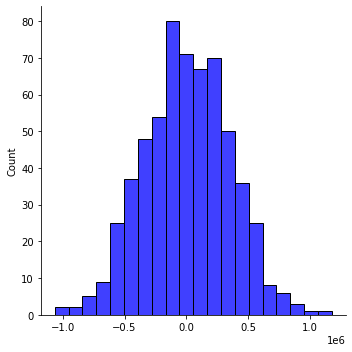

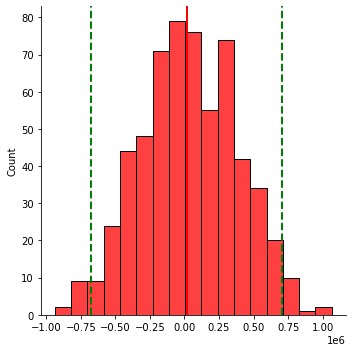

In [16]:
music_goal = np.random.normal(Goal.mean(),Goal.std(), 600)
music_goal_real = np.random.normal(Goal_Real.mean(),Goal_Real.std(), 600)

ci = stats.norm.interval(0.95,Goal.mean(),Goal.std())
plt.figure(figsize=(20,10))
sns.displot(music_goal, label='Music Goal', color='blue')
sns.displot(music_goal_real, label='Music Goal Real', color='red')

plt.axvline(Goal.mean(), color='blue', linewidth=2, label='Goal Mean')
plt.axvline(Goal_Real.mean(), color='red', linewidth=2, label='Goal Real Mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='Confidence Threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)

plt.axvline(music_goal.mean()+t_stat[0]* music_goal.std(), color='purple', linestyle='dashed', linewidth=2, label='Alternative Hypothesis')
plt.axvline(music_goal.mean()-t_stat[0]* music_goal.std(), color='purple', linestyle='dashed', linewidth=2)

plt.legend()

berdasarkan hasil diatas, dapat disimpulkan bahwa kami gagal menolak hipotesis nol antara Goal dan USD Goal Real tidak berbeda secara signifikan dalam hal rata rata 

# Kesimpulan

hitungan untuk USD Goal Real
- Mean: 45454.40146545336
- Median: 5500.0
- Modus: 5000.0
- Min: 0.01
- Max: 166361390.71
- usd_goal_real range: 166361390.70000002
- Variance: 1329293829528.3057
- Standard Deviation: 1152950.0550883831

---
- Music goal:  16056.357380291996
- Music goal real:  15372.161843676568
- P-Value:  0.7536849512505717
- T-Stat:  0.31378502209547576
- P-Value > T-Stat
- berdasarkan hasil diatas, dapat disimpulkan bahwa kami gagal menolak hipotesis nol antara Goal dan USD Goal Real tidak berbeda secara signifikan dalam hal rata rata 